# Machine Learning and Statistics Module 2020 Project

## Author John Dunne G00273895

*****************************************************************************


### Project Specification

#### Instructions


In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:
1. Jupyter notebook that trains a model using the data set. In the notebook you
should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.


To enhance your submission, you might consider developing and comparing more than
one model. Rest assured, all the above concepts will be explored in lecture videos and
other materials in the coming semester.


### Plan to complete the project

* Introduce myself to the contents of the power production data set.
* Include an introduction to the dataset in this notebook.
* Include some statistical analysis od the data set and some plots of the data set. 
* Research models that could be trained on the data set. 
* Pick a model and train it on the data set in this notebook. 
* Explain the model and give an analysis of its accuracy in this notebook. 
* Include a python script in my repository that runs a web service based on the model. 
* Design a user interface from where an end user can send a speed value via HTTP request and receive a response prediction based on the model of power production for that wind speed.
* If time permits train more than one model in this notebook.


### Contents of Notebook

* **Section 1: Introduction to the Power Production dataset**
    * Section 1.1: Reading in the powerproduction dataset csv and displaying as a pandas dataframe
    * Section 1.2: Some Statistical Analysis with pandas
    * Section 1.3: Plot the powerproduction data set
    * Section 1 References
* **Section 2: Preprocessing the data set before training a model**
    * Section 2.1: How many zero values are in the dataset?
    * Section 2.2: Drop all rows that have zero values for both speed and power
    * Section 2.3: Plot the data set before and after cleaning
    * Section 2 References 
* **Section 3: Selecting a suitable model and training on the data set**
    * Section 3.1: Introduction to Artifical Neural Networks
    * Section 3.2: Neural Networks in Keras
    * Section 3.3: Split the dataset into training and testing
    * Section 3.4: Defining a model in Keras
    * Section 3.5: Compile the model
    * Section 3.6: Train the model
    * Section 3.7: Predictions using the model
    * Section 3.8: Is the model accurate?
    * Section 3 References 
* **Section 4: Putting my model into production**
    * Section 4.1: Why is it important to deploy the model to production environment?
    * Section 4.2: Components involved in getting a web app running
    * Section 4.3: Saving a Keras model that can be accessed by a web server
    * Section 4.4: Building a Docker Container
    * Section 4 References
    


## Import the packages to be used in the project

In [1]:
# Numerical arrays
import numpy as np

# pandas imported to read in the csv and display in a pandas dataframe
import pandas as pd 

# matplotlib pyplot will be used for plotting the data set
import matplotlib.pyplot as plt

# plots
import seaborn as sns

# Neural networks
import tensorflow.keras as kr 

# split data into training and testing sets
from sklearn.model_selection import train_test_split

# to display images in this notebook
from IPython.display import Image

# Section 1 - Introduction to the Power Production dataset
**********

A brief introduction to the data set including some statistical analysis and plots.

I know from the outset the dataset contains two columns of data - wind speed and power output generated at each wind speed.

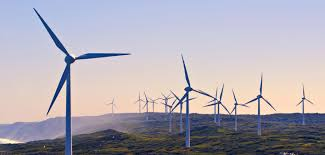

In [2]:
# add image of wind turbine from img folder in my repository 
Image(filename = "img/turbine.png", width = 800, height = 300)

### 1.1 - Reading in the powerproduction dataset csv and displaying as a pandas dataframe

pandas.read_csv is used to read comma separated value files into a dataframe [1].

In [3]:
# read in the data set with pandas from my repository
df = pd.read_csv("powerproduction.csv")
# display the datas set
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


### 1.2 Some Statistical Analysis with pandas

#### Dataframe.info()

Dataframe.info prints a concise summary about a dataframe [2].

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


#### Dataframe.shape

Dataframe.shape returns a table that shows the number of rows and columns in a dataframe [3].

In [5]:
df.shape

(500, 2)

#### Dataframe.describe()

Dataframe.describe prints a description of each column of data in the data set [4].

**Output of pandas.dataframe.describe() explained:**

* count = total number of rows of data in the data set.
* mean = the central tendency of the data.
* std = standard deviation which is a measurement of the variance of each data point relative to the mean.
* min = the smallest figure collected in each column of data.
* 25% = the 25th percentile - meaning 25% of the total count of measurements collected fall below this measurement.
* 50% = the 50th or median percentile meaning this is the central collected in each column, half of the data collected falls below this measurement and half is above this measurement. Further details on how percentile is calculated can be read here: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/percentiles-rank-range/.
* 75% = the 75th percentile - meaning 75% of the total count of measurements collected fall below this measurement and 25% are above this measurement.
* max = the largest measurement collected kin each column of data.

In [6]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


### 1.3 - Plot the powerproduction data set

### 1.3.1 - matplotlib.pyplot

I will use matplotlib.pyplot to display a plot of the data in the data set [5] customized with some rcParams commands [6].

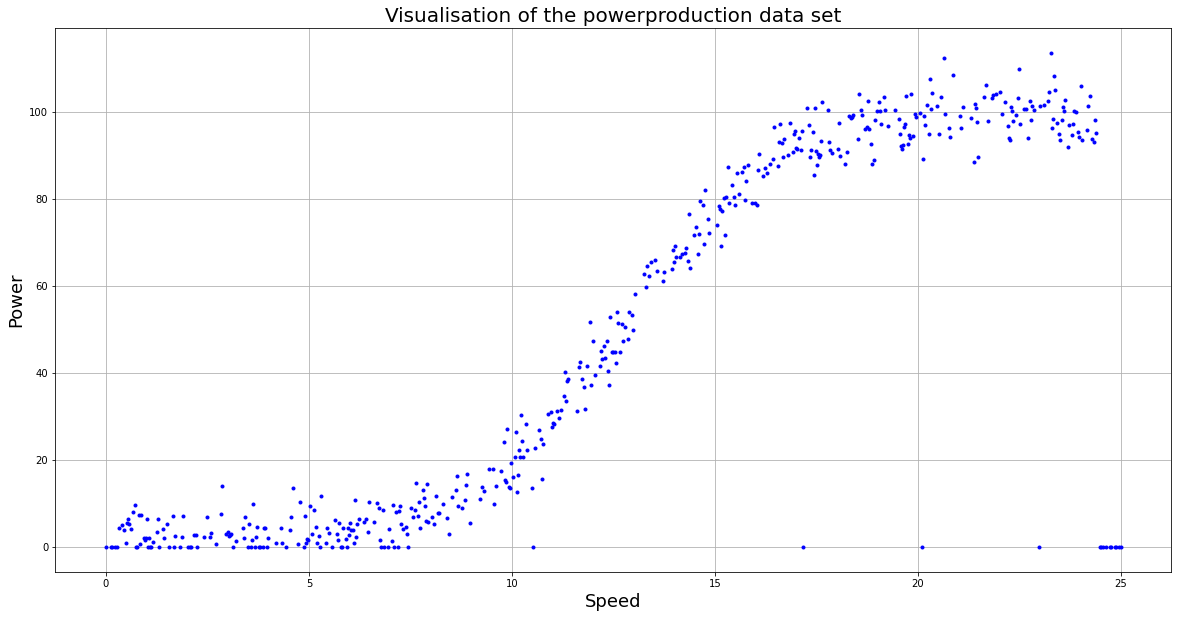

In [7]:
# rc params to customize plot appearance: https://matplotlib.org/tutorials/introductory/customizing.html
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['lines.linewidth'] = 2.5

#matplotlib.pyplot used to plot speed and power from the data set
# .b calls for blue dots in the plot
plt.plot(df['speed'], df['power'], '.b')
# add a title to the plot
plt.title('Visualisation of the powerproduction data set', fontsize=20)
# add labels to the x and y axis
plt.xlabel('Speed', fontsize=18)
plt.ylabel('Power', fontsize=18)
# display grid on the plot
plt.grid()
# show the plot
plt.show()


### 1.3.2 - Seaborn

#### Seaborn Pairplot

Pairplot is used to plot the relationship between variables in a data set. The pairplot function by default plots each variable on the y axis across a single row and the x axis across a single column. Pairplot can read in a data set from pandas df (data frame). The argument hue can be entered to add colour to the plot based on another variable in the data set [7].

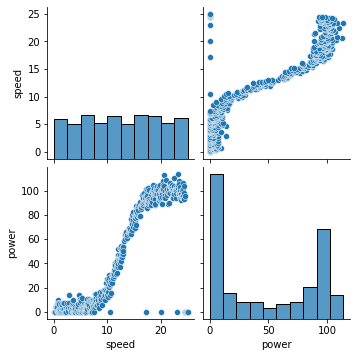

In [8]:
sns.pairplot(df)

With Seaborn pairplot a histogram is plotted by default but this can be changed by adding the diag_kind parameter which can take 3 different parameters:

* hist - plots a histogram 
* kde - density plot 
* auto - the default when hue is selected is denisty, and if hue not selected them histogram

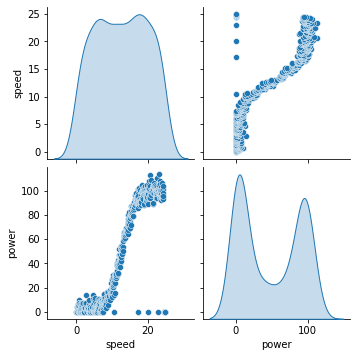

In [9]:
sns.pairplot(df, diag_kind = 'kde')

### What do the above plots say about the data?

* It looks like there are instances where zero power is generated despite high wind speeds. Possibly maintenance on the turbine caused it to be stopped at certain times.
* It looks to me that their is a linear relationship between wind speed and power production. The greater the wind speed the more power is produced. This is what I would have expected without looking at any data. 
* I would think the owners of the turbine though would want any downtime and maintenance etc factored into any forecast for future power production. 
* I find the pyplot gives a very good visual representation of the data and I increased the size using rcparams in order to get a better look at the data points.
* For the most part it looks like the higher the wind speed the more power we could expect to be generated by the turbine. 
* The amount of power generated seems to increase sharply once wind speed of over 10mph are reached. 
* This seems to plateau between 20 and 25 mph wind speed.
* Why does this happen? Maybe I can answer the question later. 

### Section 1 References

[1] pandas; pandas.read_csv; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

[2] pandas; pandas.dataframe.info; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

[3] pandas; pandas.dataframe.shape; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html

[4] pandas; pandas.dataframe.describe; https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

[5] matplotlib; matplotlib.pyplot documentation; https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

[6] matplotlib; Customizing Matplotlib with style sheets and rcParams; https://matplotlib.org/tutorials/introductory/customizing.html

[7] Seaborn, pairplot; https://seaborn.pydata.org/generated/seaborn.pairplot.html

[8] Towards data science; Visualizing data with pairplots in Python; https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166 

# Section 2 - Preprocessing the data set before training a model
****

One of the most important steps to be taken before proceeding is the pre processing of the data. As I have shown in the plots in section 1 of this notebook there are lots of zero values in the data set for power. I thin we can remove these, there are probably explanations for these zero's such as maintenance etc. 

Data cleaning refers to identifying and correcting errors in the dataset that may negatively impact a predictive model [2].



### 2.1 - How many zero values are in the dataset?

Speed column:

In [10]:
df0 = df[df["speed"] == 0]
df0

,speed,power
0,0.0,0.0


In [11]:
df0.count()

speed    1
power    1
dtype: int64

Power column:

In [12]:
df_power_0 = df[df["power"] == 0]
df_power_0

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


In [13]:
df_power_0.count()

speed    49
power    49
dtype: int64

So there are 49 zero values in the power column, which includes that one column containing a zero value for speed I showed before. I think the best thing is to remove all of these 49 rows of data from the data set. I dont think they add value.

### 2.2 - Drop all rows that have zero values for both speed and power

I have found a StackOverflow post on dropping rows in a pandas dataframe where there are zero values [4].

Below I drop the 49 rows where we have zero values.

In [14]:
# Adapted from: https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741
df_clean = df[(df != 0).all(1)]
df_clean

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [15]:
# count of rows in the cleaned data set
df_clean.count()

speed    451
power    451
dtype: int64

The new cleaned data set contains 451 rows of data.

In [16]:
# describe the cleaned data set
df_clean.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


### 2.3 - Plot the data set before and after cleaning

Text(0.5, 1.0, 'Data after cleaning')

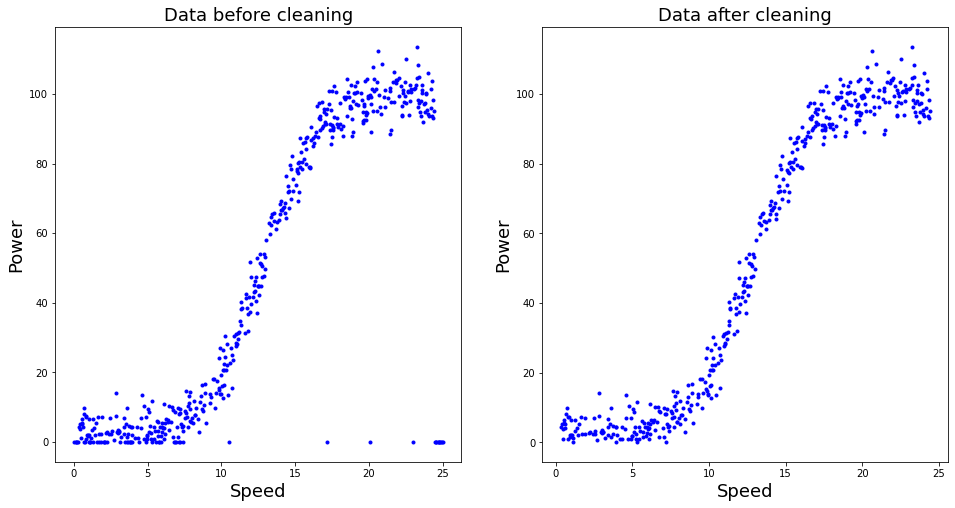

In [17]:
# Set the parameters for the subplots to be created
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the data set before and after cleaning for comparison purposes
axes[0].plot(df['speed'], df['power'], '.b')
axes[1].plot(df_clean['speed'], df_clean['power'], '.b')

# Add labels 
axes[0].set_xlabel('Speed', fontsize=18)
axes[0].set_ylabel('Power', fontsize=18)
axes[1].set_xlabel('Speed', fontsize=18)
axes[1].set_ylabel('Power', fontsize=18)

# Add titles to subplots
axes[0].set_title('Data before cleaning', fontsize=18)
axes[1].set_title('Data after cleaning', fontsize=18)

Now that the data set has been preprocessed I can proceed to research and select a suitable model for and try to traing it on the data set in this notebook.

### Section 2 - References

[1] Github Ian McLoughlin; keras-neurons; https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb

[2] Machine Learning Mastery; How to Perform Data Cleaning for Machine Learning with Python; https://machinelearningmastery.com/basic-data-cleaning-for-machine-learning/

[3] Medium; Cleaning and Prepping Data with Python for Data Science — Best Practices and Helpful Packages; https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3

[4] StackOverflow;Drop row in pandas dataframe if any value in the row equals zero; https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741

[5] Keras; Introduction to keras for engineers; https://keras.io/getting_started/intro_to_keras_for_engineers/

## Section 3 - Selecting a suitable model and training on the data set
***

In this section I should select a model and train it on the data set. Then I should make predictions and analyse if the predictions are accurate. I should capture my research in this section of the notebook.

### 3.1 - Introduction to Artificial Neural Networks
***

As discussed in the lecture series on artificial neural networks, ANN's are based on the way a human's brain operates where neurons are interconnected and communicate with each other.

I have found a blog post that give's a nice summary introduction to artifical neural networks and how they work [16]:

ANNs consist of many interconnected processors known as neurons that perform summing function. Information is stored in the weights on the connections. An ANN mimics the human brain’s biological neural network. The biological neural network is the mechanism through which a living organism’s nervous system functions, enabling complex tasks to be performed instinctively. The central processing unit of that nervous system is known as a “neuron”. The human brain has around 10 to 100 billion neurons, each connected to many others by “synapses”. The human brain has around 100 trillion synapses. These connections control the human body and its thought processes. In short, they attempt to replicate the learning processes of the human brain.

I have added below an image of an artifical neural network sourced from the same blog post [16].

In the image there are 4 layers shown:
* Input layer
* Hidden layer 1
* Hidden layer 2
* Output layer

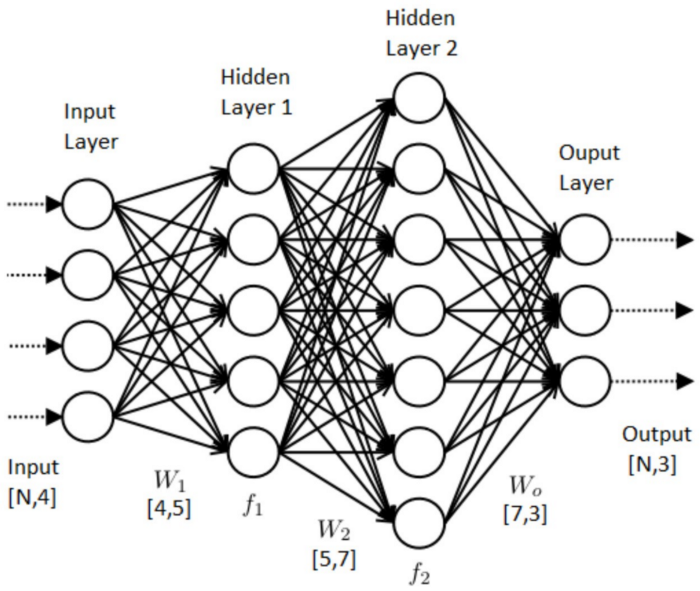

In [18]:
# display imahe of artifical neural netwrork from the img folder in my repository
Image(filename = "img/neuralnetwork.png", width = 800, height = 400)

#### ANN's and artifical intelligence

I have found another interesting web page [17] that gives some further insight into ANN's and I have included the extract below:

An artificial neural network (ANN) is the piece of a computing system designed to simulate the way the human brain analyzes and processes information. It is the foundation of artificial intelligence (AI) and solves problems that would prove impossible or difficult by human or statistical standards. ANNs have self-learning capabilities that enable them to produce better results as more data becomes available.

**KEY TAKEAWAYS**
* An artificial neural network (ANN) is the component of artificial intelligence that is meant to simulate the functioning of a human brain.
* Processing units make up ANNs, which in turn consist of inputs and outputs. The inputs are what the ANN learns from to produce the desired output.
* Backpropagation is the set of learning rules used to guide artificial neural networks.
* The practical applications for ANNs are far and wide, encompassing finance, personal communication, industry, education, and so on.

### 3.2 - Neural Networks in Keras
***

Keras comes as part of the tensorflow machine learning installation in Python. Please see Readme file in my repository for details on installing tensorflow on your machine.

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research [3].

Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code [6].

The keras homepage [3] has extensive documentation on creating neural networks.

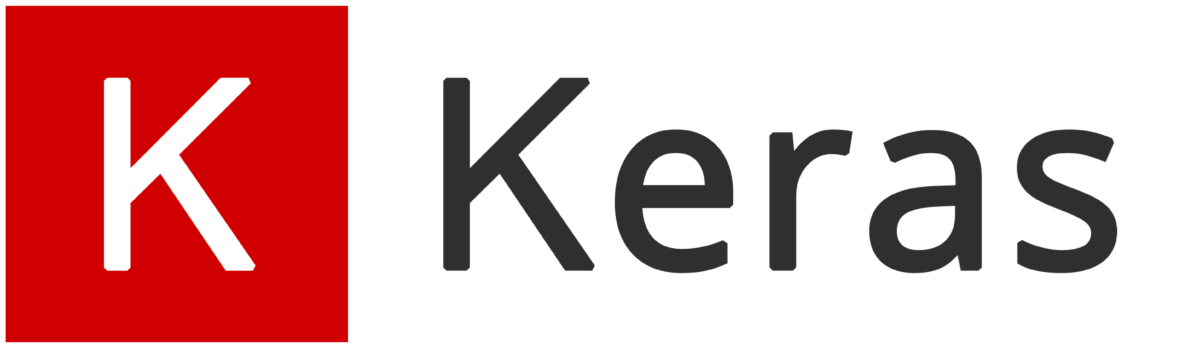

In [19]:
# image sourced from keras homepage [3]
Image(filename = "img/keras.png", width = 800, height = 400)

#### Inputs and Outputs

Neural networks expect numerical inputs and so the power production dataset is ideal for working with a neural network as it has just 2 columns of numerical data. 

**Input variable (X) = Speed**

**Output variable (y) = Power**

The inputs and outpts are separate and distinct from each other.

In my case there is 1 input (speed) and 1 output (power).

#### Convert data to numpy array

I will convert the data from a pandas dataframe to a numpy array in order to feed the data into keras and train a neural network. I do this below following an example from [5]:

In [20]:
# Adapted from [5]
# Changing pandas dataframe to numpy array
X = df_clean.iloc[:,0].values
y = df_clean.iloc[:,1].values

In [21]:
# X is the input (speed)
X

array([ 0.325,  0.4  ,  0.45 ,  0.501,  0.526,  0.551,  0.576,  0.626,
        0.676,  0.701,  0.801,  0.826,  0.851,  0.926,  0.951,  0.976,
        1.001,  1.051,  1.101,  1.151,  1.251,  1.276,  1.401,  1.426,
        1.502,  1.652,  1.702,  1.877,  1.902,  2.177,  2.227,  2.402,
        2.477,  2.553,  2.578,  2.703,  2.828,  2.853,  2.953,  3.003,
        3.028,  3.053,  3.078,  3.203,  3.378,  3.403,  3.428,  3.529,
        3.604,  3.629,  3.704,  3.729,  3.904,  3.929,  3.954,  3.979,
        4.179,  4.304,  4.329,  4.53 ,  4.555,  4.605,  4.73 ,  4.78 ,
        4.905,  4.93 ,  4.955,  4.98 ,  5.03 ,  5.08 ,  5.13 ,  5.18 ,
        5.205,  5.255,  5.28 ,  5.305,  5.43 ,  5.455,  5.506,  5.631,
        5.681,  5.706,  5.731,  5.831,  5.906,  5.956,  5.981,  6.006,
        6.031,  6.081,  6.106,  6.131,  6.156,  6.181,  6.231,  6.356,
        6.406,  6.456,  6.481,  6.607,  6.682,  6.732,  6.757,  6.832,
        6.982,  7.057,  7.082,  7.157,  7.182,  7.207,  7.232,  7.257,
      

In [22]:
# y will be the output value (power)
y

array([4.33100e+00, 5.18600e+00, 3.82600e+00, 1.04800e+00, 5.55300e+00,
       6.49800e+00, 5.24100e+00, 4.22000e+00, 7.97400e+00, 9.74600e+00,
       7.27100e+00, 7.95000e-01, 7.35000e+00, 1.99600e+00, 1.60900e+00,
       2.06400e+00, 6.51100e+00, 2.08500e+00, 1.21000e-01, 1.20800e+00,
       3.37300e+00, 6.51000e+00, 4.15600e+00, 2.00500e+00, 5.35200e+00,
       7.22100e+00, 2.43900e+00, 2.35900e+00, 7.04800e+00, 2.70100e+00,
       2.86900e+00, 2.28700e+00, 6.94700e+00, 2.37000e+00, 3.16500e+00,
       6.67000e-01, 7.55900e+00, 1.41310e+01, 2.89400e+00, 3.57800e+00,
       2.63300e+00, 2.83600e+00, 3.06300e+00, 1.36000e+00, 4.33400e+00,
       2.16700e+00, 6.81900e+00, 5.30000e+00, 1.53500e+00, 9.89000e+00,
       2.27000e+00, 4.59500e+00, 4.45300e+00, 4.41500e+00, 1.32000e-01,
       2.03000e+00, 1.03500e+00, 4.43700e+00, 1.04300e+00, 3.93400e+00,
       6.82400e+00, 1.35920e+01, 8.20000e-01, 1.04440e+01, 7.06000e+00,
       9.46000e-01, 1.90700e+00, 1.68100e+00, 9.51900e+00, 2.973

Check the number of elements in each array is correct.

In [23]:
X.size

451

In [24]:
y.size

451

The data is now ready so I should proceed with training a neural network using keras.

### 3.3 Split the dataset into training and testing
****
In order to train the model I need to split the dataset into a training set to train the model on and a test set to test the trained model on. 

I have found a detailed article explaining the use of training, validation and testing data sets in machine learning [10] which gives the below explanations:

**Training Dataset:** The sample of data used to fit the model. The actual dataset that we use to train the model (weights and biases in the case of a Neural Network). The model sees and learns from this data.

**Validation Dataset** The validation set is used to evaluate a given model, but this is for frequent evaluation. 

**Test Dataset:** The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. The Test dataset provides the gold standard used to evaluate the model. It is only used once a model is completely trained.

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem [11]. 

### scikit-learn model selection train test split

The scikit-learn Python machine learning library provides an implementation of the train-test split evaluation procedure via the train_test_split() function [11].

I have imported the sklearn.model_selection.train_test_split at the beginning of this notebook and will use it below to split my data with 33% in a test set and 67% in a training set. 

The documentation on scikit learn train test split is at [12].

**Random state** 

Another important consideration is that rows are assigned to the train and test sets randomly. This is done to ensure that datasets are a representative sample (e.g. random sample) of the original dataset, which in turn, should be a representative sample of observations from the problem domain. This can be achieved by fixing the seed for the pseudo-random number generator used when splitting the dataset. This can be achieved by setting the “random_state” to an integer value. Any value will do; it is not a tunable hyperparameter [11].

#### Split the data into train and test

In [25]:
# Adapted from [11]
# split the data set into training and testing set with 33% of the data in test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

#### See the size of the training set

In [26]:
# See the size of the training set
X_train.size

302

In [27]:
y_train.size

302

#### See the size of the test set

In [28]:
# see the size of the testing set
X_test.size

149

In [29]:
y_test.size

149

#### Plot the training set and testing set to see distribution

I have added a plot to visually see if the data points in the test set are evenly distributed versus the distribution of the data points in the testing set.

Text(0.5, 1.0, 'Test set')

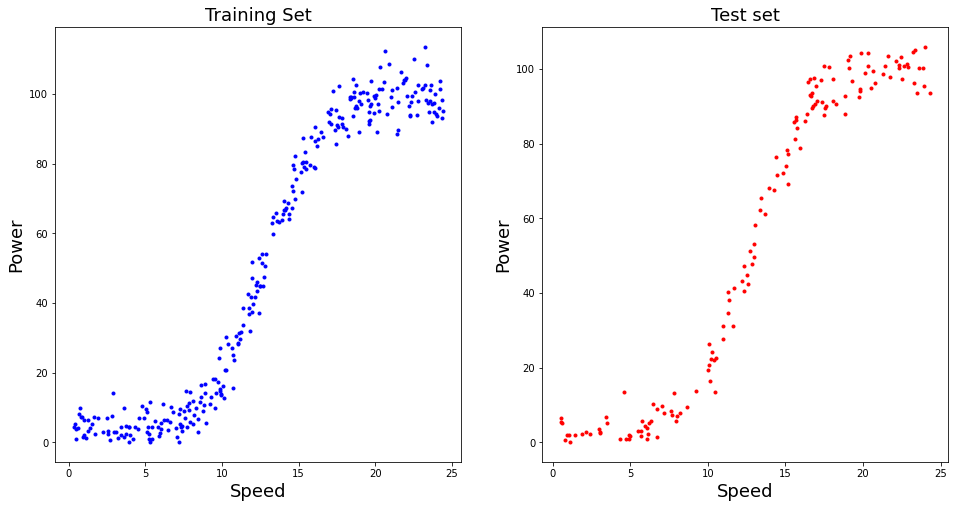

In [30]:
# Set the parameters for the subplots to be created
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the data set before and after cleaning for comparison purposes
axes[0].plot(X_train, y_train, '.b')
axes[1].plot(X_test, y_test, '.r')

# Add labels 
axes[0].set_xlabel('Speed', fontsize=18)
axes[0].set_ylabel('Power', fontsize=18)
axes[1].set_xlabel('Speed', fontsize=18)
axes[1].set_ylabel('Power', fontsize=18)

# Add titles to subplots
axes[0].set_title('Training Set', fontsize=18)
axes[1].set_title('Test set', fontsize=18)

The training and test set look to have a fairly similiar distribution and so the train/test split should give an accurate representation of the data set.

### 3.4 - Defining a model in Keras
***

I will attempt to explain below the elements/steps involved in defining a neural network model in Keras. 

#### Layers

A neural network consists of layers typically:

* Input layer
* Hidden layer(s)
* Output layer

#### Input shape

The input shape to a layer should be defined. If adding more than one layer there is no need to specify the number of input dimensions again as the model is defined as sequential. Keras will consider the input dimension to be the same size as the output of the previous layer. 

In my neural network, I have defined my input shape as 1 in the hidden layer, I did not have to specify shape in the output layer as Keras takes the input shape to the output layer to be the output of the previously added hidden layer.

#### Difference between a layer and a model

A "layer" is a simple input-output transformation. A "model" is a directed acyclic graph of layers. You can think of a model as a "bigger layer" that encompasses multiple sublayers and that can be trained via exposure to data [4].

Models in Keras are defined as a sequence of layers. We create a Sequential model and add layers one at a time until we are happy with our network architecture [6].

The most common and most powerful way to build Keras models is the Functional API. To build models with the Functional API, you start by specifying the shape (and optionally the dtype) of your inputs [4].

Define model- Now we need a neural network model. This means we need to specify the number of hidden layers in the neural network and their size, the input and output size [5].

In Keras a neural network can be defined in the sequential class which is a linear stack of layers [13].

When a model is defined in keras a layer is added with the model.add command and should include some parameters that I will outline below.

#### The type of layer should be defined

I have taken an extract from a blog post below [13]:

There are a large number of core Layer types for standard neural networks.

Some common and useful layer types you can choose from are:

* Dense: Fully connected layer and the most common type of layer used on multi-layer perceptron models.
* Dropout: Apply dropout to the model, setting a fraction of inputs to zero in an effort to reduce over fitting.
* Merge: Combine the inputs from multiple models into a single model.

I have chosen to add densely connected layers in my model as these are the layers we looked at in lecture examples.

#### Weights and biases

Each input carries a weight between zero and one. This weight is multiplied by the actual input for all inputs and this feeds into the output. In the diagram below the inputs are x1, x2 and x3 and the weights are w1, w2 and w3. 

A bias can be applied to each neuron in a hidden layer which is another number between zero and one. In the diagram below the bias is shown as b.

An algorithm known as gradient descent controls the weights and biases that is used in keras to define neural networks.

#### Activation function

The type of activation function for a layer should be specified also.

Keras supports a range of standard neuron activation function, such as: softmax, rectifier, tanh and sigmoid. You typically specify the type of activation function used by a layer in the activation argument, which takes a string value [13].

A full list of activation functions can be viewed at [15].

In the diagram below the activation function is f.

The activation function is applied to the result of the calculation shown on the right side of the below diagram.

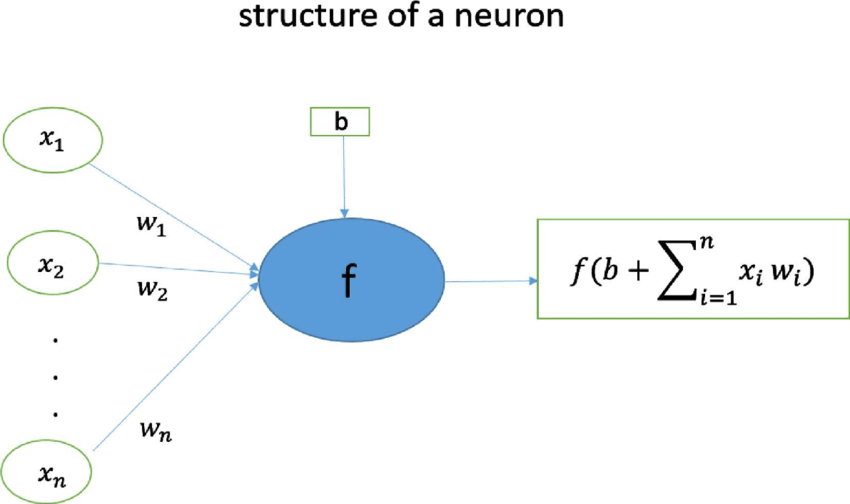

In [31]:
# Image sourced from [18]
Image(filename = "img/structureneuron.png", width = 800, height = 400)

#### Kernel Initializer

The below extract is taken from a blog post I read [13]:

Some common types of layer initialization include:

* “uniform“: Weights are initialized to small uniformly random values between 0 and 0.05.
* “normal“:Weights are initialized to small Gaussian random values (zero mean and standard deviation of 0.05).
* “zero“: All weights are set to zero values.

A full list of layer wight initializers can be viewed here: https://keras.io/api/layers/initializers/

In the neural network I have designed I have chosen the glorot_uniform weight initializer.

Draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / (fan_in + fan_out)) (fan_in is the number of input units in the weight tensor and fan_out is the number of output units) [14].

I spent a few hours researching the differences between kernel initializers and tried them out in this notebook before finally settling on using the glorot_uniform initializer.

#### My neural network

* I have added a hidden layer to my neural network containing 50 neurons using the sigmoid activation function. 
* Prior to this I ran trials with two hidden layers containing 10 neurons each but I changed after further trial and error. The predictions seemed to flat line for wind speeds between 20 and 25. 
* I started out with a linear activation function which was not the best fit for the shape of output for wind power prediction. 
* I knew from the lecture series and additional research that this was the best fit shape for the predicted data to be fitted to.
* I have also defined the output layer (I did not have to specify an input shape for the output layer).

In [32]:
# Adapted from examples in [1] and [2]

# Create a new neural network with sequential layers
model = kr.models.Sequential()

# Orignal model I developed with linear activation function
# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
#model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# add a hidden layer with a sigmoid acivation function containing 10 neurons
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

# add a 2nd hidden layer same as the first hidden layer - removed as was giving low predictions between 20 and 25
#model.add(kr.layers.Dense(10, input_shape=(1,), activation='sigmoid', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

# add the output layer which has a linear activation function, no need to define input shape
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

# tried using sigmoid activation on output layer but didnt look right 
#model.add(kr.layers.Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))

### 3.5 - Compile the model
***

The next step is to compile or build the model using the model.compile command.

The loss and optimizer should be defined when compiling the model.

**loss function** 

We must specify the loss function to use to evaluate a set of weights [6].

The purpose of loss functions is to compute the quantity that a model should seek to minimize during training [19].

In plainer terms, the loss function is the calculation performed by the neural network to determine if it is getting closer to the expected outputs or further away from the expected outputs.

A full list of the loss functions available in keras can be viewed at [19].

In case of my model I have chosen to use the mean_square_error loss function [20].

The mean_squared_error loss function subtracts the difference between all expected outputs and actual outputs and squares the difference. The difference of all pairs is then added together and divided by the number of outputs. 

I sourced the below image showing the mean squared error calculation in further detail from [21]:

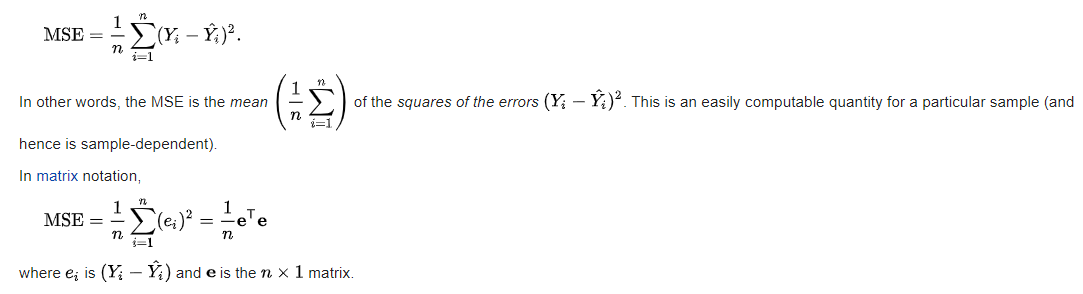

In [33]:
# image sourced from [21]
Image(filename = "img/meansquareerror.png", width = 800, height = 400)

**optimizer** 

The optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training [6].

The optimizer is the means by which the weights and biases are adjusted when the training set is passed in to the neural network, in order to progress towards the expected output.

I have chose the adam optimizer for my model [9]. In the lecture series we looked at the sgd (stochastic gradient descent method) optimizer.

Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters" [9].


In [34]:
# Compile the model.
model.compile(loss="mean_squared_error", optimizer="adam")

#### model.summary()

You can print a summary of how your data gets transformed at each stage of the model. This is useful for debugging [4].

In the summary below the # of params shows in the first hidden layer there are 20 trainable params, in the second hidden layer there are 110 trainable params and in the output layer there are 11 trainable params.

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


### 3.6 - Train the model
***

The next step is to train your model on your data. The Model class features a built-in training loop, the fit() method. It accepts Dataset objects, Python generators that yield batches of data, or NumPy arrays [4].

Besides the data, you have to specify two key parameters: the batch_size and the number of epochs (iterations on the data). Since the data yielded by a dataset is expected to be already batched, you don't need to specify the batch size here [4].

**Epoch**

The number of iterations. I will set the number of epochs to be 500. I expect to see a lower loss at each epoch.

**Batch Size**

Usually, the dataset is very big and we cannot fit complete data at once so we use batch size. This divides our data into batches each of size equal to batch_size. Now only this number of samples will be loaded into memory and processed. Once we are done with one batch it is flushed from memory and the next batch will be processed [5].

I will train the model on the training set which is 67% of the total clean dataset. 

In [36]:
# train the neural network model passing in the training set X as input
# 500 epochs and batch size of 10
model.fit(X_train, y_train, epochs=500, batch_size=10)

Epoch 1/500
31/31 [==============================] - 0s 5ms/step - loss: 4221.0586
Epoch 2/500
31/31 [==============================] - 0s 4ms/step - loss: 4092.9446
Epoch 3/500
31/31 [==============================] - 0s 4ms/step - loss: 3958.1101
Epoch 4/500
31/31 [==============================] - 0s 3ms/step - loss: 3806.7959
Epoch 5/500
31/31 [==============================] - 0s 3ms/step - loss: 3630.6135: 0s - loss: 3713.52
Epoch 6/500
31/31 [==============================] - 0s 9ms/step - loss: 3438.7883
Epoch 7/500
31/31 [==============================] - 0s 4ms/step - loss: 3261.6777
Epoch 8/500
31/31 [==============================] - 0s 3ms/step - loss: 3121.4395
Epoch 9/500
31/31 [==============================] - 0s 4ms/step - loss: 3009.1216
Epoch 10/500
31/31 [==============================] - 0s 3ms/step - loss: 2910.1770
Epoch 11/500
31/31 [==============================] - 0s 3ms/step - loss: 2821.5208
Epoch 12/500
31/31 [==============================] - 0s 3ms/step

31/31 [==============================] - 0s 3ms/step - loss: 343.0116
Epoch 99/500
31/31 [==============================] - 0s 3ms/step - loss: 334.8099
Epoch 100/500
31/31 [==============================] - 0s 2ms/step - loss: 325.0833
Epoch 101/500
31/31 [==============================] - 0s 3ms/step - loss: 316.2625
Epoch 102/500
31/31 [==============================] - 0s 3ms/step - loss: 307.8083
Epoch 103/500
31/31 [==============================] - 0s 3ms/step - loss: 300.1714
Epoch 104/500
31/31 [==============================] - 0s 2ms/step - loss: 291.5656
Epoch 105/500
31/31 [==============================] - 0s 3ms/step - loss: 284.0521
Epoch 106/500
31/31 [==============================] - 0s 3ms/step - loss: 276.0637
Epoch 107/500
31/31 [==============================] - 0s 3ms/step - loss: 268.6752
Epoch 108/500
31/31 [==============================] - 0s 3ms/step - loss: 262.7853
Epoch 109/500
31/31 [==============================] - 0s 3ms/step - loss: 255.1155
Epoch 1

31/31 [==============================] - 0s 3ms/step - loss: 66.9099
Epoch 197/500
31/31 [==============================] - 0s 3ms/step - loss: 66.7500
Epoch 198/500
31/31 [==============================] - 0s 2ms/step - loss: 65.9359
Epoch 199/500
31/31 [==============================] - 0s 2ms/step - loss: 65.5154
Epoch 200/500
31/31 [==============================] - 0s 2ms/step - loss: 65.4228
Epoch 201/500
31/31 [==============================] - 0s 2ms/step - loss: 65.0666
Epoch 202/500
31/31 [==============================] - 0s 2ms/step - loss: 64.6152
Epoch 203/500
31/31 [==============================] - 0s 2ms/step - loss: 64.4205
Epoch 204/500
31/31 [==============================] - 0s 2ms/step - loss: 64.0940
Epoch 205/500
31/31 [==============================] - 0s 3ms/step - loss: 63.9980
Epoch 206/500
31/31 [==============================] - 0s 2ms/step - loss: 63.8047
Epoch 207/500
31/31 [==============================] - 0s 2ms/step - loss: 63.4064
Epoch 208/500
31/3

31/31 [==============================] - 0s 2ms/step - loss: 44.0385
Epoch 295/500
31/31 [==============================] - 0s 2ms/step - loss: 43.7926
Epoch 296/500
31/31 [==============================] - 0s 2ms/step - loss: 43.7660
Epoch 297/500
31/31 [==============================] - 0s 2ms/step - loss: 43.5954
Epoch 298/500
31/31 [==============================] - 0s 3ms/step - loss: 42.8982
Epoch 299/500
31/31 [==============================] - 0s 3ms/step - loss: 42.6788
Epoch 300/500
31/31 [==============================] - 0s 2ms/step - loss: 42.4722
Epoch 301/500
31/31 [==============================] - 0s 2ms/step - loss: 42.2754
Epoch 302/500
31/31 [==============================] - 0s 2ms/step - loss: 41.8910
Epoch 303/500
31/31 [==============================] - 0s 3ms/step - loss: 41.6495
Epoch 304/500
31/31 [==============================] - 0s 2ms/step - loss: 41.5054
Epoch 305/500
31/31 [==============================] - 0s 2ms/step - loss: 41.2956
Epoch 306/500
31/3

31/31 [==============================] - 0s 4ms/step - loss: 25.5845
Epoch 393/500
31/31 [==============================] - 0s 4ms/step - loss: 25.5140
Epoch 394/500
31/31 [==============================] - 0s 4ms/step - loss: 25.6447: 0s - loss: 25.89
Epoch 395/500
31/31 [==============================] - 0s 4ms/step - loss: 25.5577
Epoch 396/500
31/31 [==============================] - 0s 6ms/step - loss: 25.3112
Epoch 397/500
31/31 [==============================] - 0s 5ms/step - loss: 25.3224
Epoch 398/500
31/31 [==============================] - 0s 4ms/step - loss: 25.0568
Epoch 399/500
31/31 [==============================] - ETA: 0s - loss: 26.98 - 0s 5ms/step - loss: 25.3202
Epoch 400/500
31/31 [==============================] - 0s 5ms/step - loss: 24.9566
Epoch 401/500
31/31 [==============================] - 0s 4ms/step - loss: 24.8264
Epoch 402/500
31/31 [==============================] - 0s 4ms/step - loss: 24.6652
Epoch 403/500
31/31 [==============================] - 0s 5

31/31 [==============================] - 0s 3ms/step - loss: 20.6055
Epoch 489/500
31/31 [==============================] - 0s 3ms/step - loss: 20.5881
Epoch 490/500
31/31 [==============================] - 0s 3ms/step - loss: 20.5710
Epoch 491/500
31/31 [==============================] - 0s 3ms/step - loss: 20.5005
Epoch 492/500
31/31 [==============================] - 0s 3ms/step - loss: 20.6546
Epoch 493/500
31/31 [==============================] - 0s 3ms/step - loss: 20.5114
Epoch 494/500
31/31 [==============================] - 0s 3ms/step - loss: 20.6762
Epoch 495/500
31/31 [==============================] - ETA: 0s - loss: 19.49 - 0s 3ms/step - loss: 20.5430
Epoch 496/500
31/31 [==============================] - 0s 3ms/step - loss: 20.6772
Epoch 497/500
31/31 [==============================] - 0s 3ms/step - loss: 20.5830
Epoch 498/500
31/31 [==============================] - 0s 3ms/step - loss: 20.5297
Epoch 499/500
31/31 [==============================] - ETA: 0s - loss: 19.29 

The loss gets smaller at each epoch but it looks to me like the loss at the end is larger than I would have expected.

### 3.7 Predictions using the model
***

Model.predict is used to predict the output for a given input. In this case given a wind speed what would be the predicted power output. 

add more info later

#### Predict some random input wind speeds

In [37]:
model.predict([10.0])

array([[22.362038]], dtype=float32)

In [38]:
model.predict([15.0])

array([[75.69592]], dtype=float32)

In [39]:
model.predict([20.0])

array([[98.4427]], dtype=float32)

In [40]:
model.predict([25.0])

array([[102.38681]], dtype=float32)

#### Predict the full test set of 149 data points

In [41]:
# Adapted from [5]
predictions = model.predict(X_test)
predictions

array([[ 98.68997  ],
       [ 69.90857  ],
       [ 22.225098 ],
       [  4.0505447],
       [  4.43182  ],
       [100.40021  ],
       [  3.9182444],
       [100.26977  ],
       [  3.9946806],
       [ 35.845333 ],
       [  4.6691313],
       [ 55.243412 ],
       [ 91.642166 ],
       [  3.931959 ],
       [101.79288  ],
       [ 99.61681  ],
       [ 81.67192  ],
       [ 86.1868   ],
       [101.49321  ],
       [ 55.81407  ],
       [ 65.91241  ],
       [ 71.102936 ],
       [ 88.261314 ],
       [ 87.597534 ],
       [  4.665841 ],
       [  4.67058  ],
       [ 98.16333  ],
       [  7.3121567],
       [ 89.14876  ],
       [ 82.71384  ],
       [ 88.64755  ],
       [  4.695227 ],
       [101.75563  ],
       [ 80.40365  ],
       [ 27.024414 ],
       [ 31.993172 ],
       [  8.75996  ],
       [ 23.85073  ],
       [ 76.66338  ],
       [ 85.595    ],
       [ 99.00991  ],
       [ 32.263325 ],
       [ 26.027435 ],
       [  4.685869 ],
       [  9.594503 ],
       [ 9

In [42]:
predictions.size

149

### 3.8 Is the model accurate?
***

Model.evaluate can be used to check the accuracy of the model's predictions.

In [43]:
model.evaluate(X_train, y_train)

10/10 [==============================] - 0s 4ms/step - loss: 20.3524


20.35240364074707

#### Plot the actual and predicted data

I will plot the actual input and output pairs from the test set against the actual input and predicted output pairs as predicted by the model. This will give a visual comparison of the accuracy of the model.

Text(0.5, 1.0, 'Actual inputs & Predicted outputs')

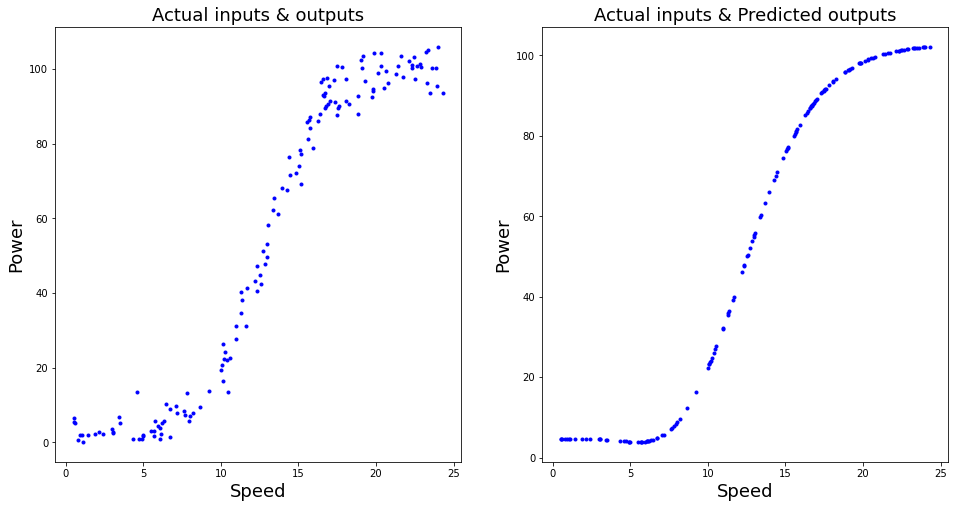

In [44]:
# Set the parameters for the subplots to be created
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Plot the actual data from the test set and the predicted data 
axes[0].plot(X_test, y_test,  '.b')
axes[1].plot(X_test, predictions, '.b')

# Add labels 
axes[0].set_xlabel('Speed', fontsize=18)
axes[0].set_ylabel('Power', fontsize=18)
axes[1].set_xlabel('Speed', fontsize=18)
axes[1].set_ylabel('Power', fontsize=18)

# Add titles to subplots
axes[0].set_title('Actual inputs & outputs', fontsize=18)
axes[1].set_title('Actual inputs & Predicted outputs', fontsize=18)


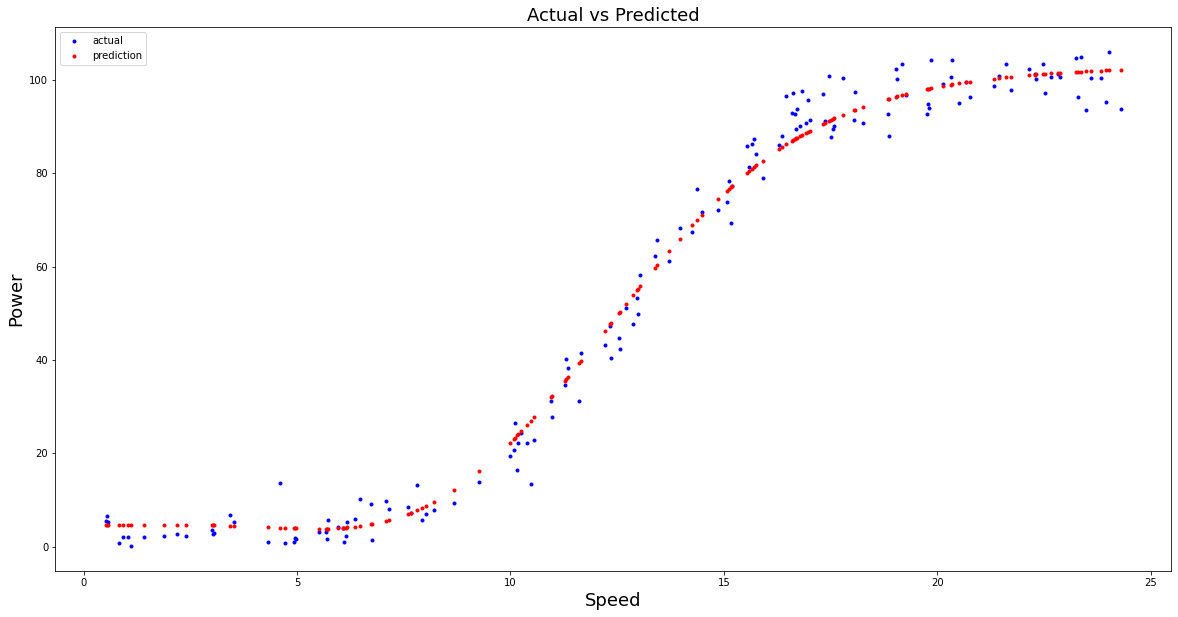

In [45]:
# plot actual power output of test set vs predicted power output for test set
plt.plot(X_test, y_test,  '.b', label='actual')
plt.plot(X_test, predictions, '.r', label='prediction')

# set title
plt.title('Actual vs Predicted', fontsize=18)

plt.xlabel('Speed', fontsize=18)
plt.ylabel('Power', fontsize=18)

# add legend
plt.legend();


#### Accuracy Conclusion

* I chose a linear activation function the first time around and arriving to the plot here it did not look the best fit.
* As touched on in the lecture series the linear activation function fits the points to a straight line.
* The predictions looked fairly accurate but the fact they were being fitted to a straight line did not suit the data here. 
* I can see from my plotting of the data set earlier in this notebook that the data does not follow a straight line.
* I returned and completed some further research and added a sigmoid activation function to the input layer.
* I added a hidden layer which was returning a more accurate fit.
* I tried out the hidden layer with different numbers of neurons.
* I added a second hidden layer containing 10 neurons which reduced the predictions for the higher wind speeds between 20 and 25 a little.
* When I added the second hidden layer I reduced the number of neurons in the first layer to also be 10.
* It looked to me that having the 2 hidden layers of 10 neurons was causing power predictions for wind speeds between 20 and 25 to flat line and to be lower than they should be.
* I then rturned and tried having 1 hidden layer containing 50 neurons which looked more accurate.
* The plots above shows the predicted values are fairly accurate using a sigmoid activation function.
* There are multiple different ways I could have chosen to proceed, I could have added more layers, I could have added different weights and biases, different activation functions or added more neurons.
* In the end I am satisfied this model is returning resonably accurate power output predictions based on the wind speeds entered.

### Section 3 - References

[1] Github Ian McLoughlin; keras-neurons; https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb

[2] Github Ian McLoughlin; Linear Regression in Keras; https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb

[3] Keras; About Keras; https://keras.io/about/

[4] Keras; Introduction to keras for engineers; https://keras.io/getting_started/intro_to_keras_for_engineers/

[5] Towards Data Science; Building our first neural network in keras; https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

[6] Machine learing mastery; Your First Deep Learning Project in Python with Keras Step-By-Step; https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

[7] Keras; Layer activation functions; https://keras.io/api/layers/activations/

[8] Keras; Dense layer; https://keras.io/api/layers/core_layers/dense/

[9] Keras; Adam; https://keras.io/api/optimizers/adam/

[10] Towards Data Science; About Train, Validation and Test Sets in Machine Learning;  https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

[11] Machine learning mastery; Train-Test Split for Evaluating Machine Learning Algorithms; https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

[12] scikit learn; sklearn.model_selection.train_test_split; https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[13] Machine learning mastery; How To Build Multi-Layer Perceptron Neural Network Models with Keras; https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/

[14] Keras; layers/initializers; https://keras.io/api/layers/initializers/

[15] Keras, layers/activations; https://keras.io/api/layers/activations/

[16] medium;The Artificial Neural Networks handbook: Part 1;  https://medium.com/coinmonks/the-artificial-neural-networks-handbook-part-1-f9ceb0e376b4

[17] investopedia; Artificial Neural Network (ANN); https://www.investopedia.com/terms/a/artificial-neural-networks-ann.asp

[18] Github Ian McLoughlin; neuron-class.ipynb; https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/neuron-class.ipynb

[19] Keras; losses; https://keras.io/api/losses/

[20] Keras; Regression losses; https://keras.io/api/losses/regression_losses/#mean_squared_error-function

[21] Wikipedia; Mean squared error; https://en.wikipedia.org/wiki/Mean_squared_error

## Section 4 -  Putting my model into production
***
In this section I will capture the research and key points associated with getting the model I have developed out into the wild where end users can hopefully pass in wind speeds and have a power production output prediction returned to them in real time.

The steps involved:

* Running a flask server in a virtual environment or on a local machine. This requires a python file containing the code required to run a flask app.
* The end user can enter a speed in the static html page when the app is running.
* The end user will have a predicted power output returned to the browser corresponding to the wind speed entered.
* The power output will be returned based on the prediction of the model trained in this jupyter notebook.
* This is achieved by adding an app route in the python flask server which returns the predicted power output for the wind speed inputted.
* The model.predict command is executed on the wind speed in the python server file with the predicted power output served to an app route for that wind speed such as /predict/20 for a wind speed of 20 for example.
* The user passes in a wind speed to the static html page and a Ajax function is called. The function takes the user inputted number as wind speed and returns the predicted output from the corresponding app route vis a 'GETS' method.
* These are all concepts I have previously explored in the Data Representation module in this semester.

### 4.1 -  Why is it important to deploy the model to production environment?
***

The goal of building a machine learning model is to solve a problem, and a machine learning model can only do so when it is in production and actively in use by consumers. As such, model deployment is as important as model building. The goal of building a machine learning model is to solve a problem, and a machine learning model can only do so when it is in production and actively in use by consumers. As such, model deployment is as important as model building [2].

So I can see this is an important step in the process. Detailed below are the components involved in getting a web servuce up and running.

### 4.2 - Components involved in getting a web app running
***

**python server**

I have included a server.py file in my repository that can be run in a virtual environment or on the users local machine. The code was adapted from the random-app repository we saw in the lecture series on web services [1].

This file runs a flask server which allows me to get a simple web application up and running on my local machine. The Flask documentation can be found at [8].

**static html page**

This is the static html page that will act as the user front end of my API. The end user can enter their wind speed values as a HTTP request on this static html page and receive back a predicted power output value on the same static html page. There is a button with an on click event that calls an Ajax function. This function takes the value the user entered in the input text box as input. The user entered number is passed to the app route in the server.py file which returns a predicted power output for that wind speed value at the associated app route - example - /predict/20 for a wind speed of 20.

**venv (Virtual Environment)**

I created a virtual environemnt on my local machine. The key aspect of this is that you should ideally only install the essential packages required to run your program in order to save real estate. I have met some problems installing tensorflow on a virtual environment. I have added this venv to my .gitignore file so as to not have the venv pushed up to Github.

**requirements.txt**

A text file containing a list of the required packages that must be installed in order to successfully run the program. Installation of required packages can be done by directly reading requirements.txt file with the command pip install -r requirements.txt. 

**.gitignore file**

Contents of the .gitignore file are ignored by git when tracking changes in the repository. This is important as you would not want the virtual environment you created on your local machine to be pushed to Github for example.

### 4.3 - Saving a Keras model that can be accessed by a web server

I have read the tensorflow documentation to find out how to save my model to allow me to load it from the python sever in order to access the model for my web application.

Below are the main points from the documentation pages [6]:

The Keras API makes it possible to save all of these pieces to disk at once, or to only selectively save some of them:

Saving everything into a single archive in the TensorFlow SavedModel format (or in the older Keras H5 format). This is the standard practice.

**The short answer to saving & loading
If you only have 10 seconds to read this guide, here's what you need to know.**

Saving a Keras model:

* model = ...  # Get model (Sequential, Functional Model, or Model subclass)
* model.save('path/to/location')

Loading the model back:


* from tensorflow import keras
* model = keras.models.load_model('path/to/location')

There are two formats you can use to save an entire model to disk: the TensorFlow SavedModel format, and the older Keras H5 format. The recommended format is SavedModel. It is the default when you use model.save().

You can switch to the H5 format by:

* Passing save_format='h5' to save().
* Passing a filename that ends in .h5 or .keras to save().

I also found a blog post on saving and loading keras deep learning models [7] which states:

Keras also supports a simpler interface to save both the model weights and model architecture together into a single H5 file.

Saving the model in this way includes everything we need to know about the model, including:

Model weights.
Model architecture.
Model compilation details (loss and metrics).
Model optimizer state.
This means that we can load and use the model directly, without having to re-compile it as we did in the examples above.

Note: this is the preferred way for saving and loading your Keras model.

I have saved my model in a .h5 file below. I then load this model into my python flask server and call model.predict at an app route to return predicted power output for wind speeds entered.

#### Saving my model

In [46]:
# save the model as a h5 file in my repository, commented out for now until notebook finished
model.save("model.h5")
print("model saved")

model saved



tidy up later


I have found a blog post [4]  that explains how to :
1. Training a machine learning model on a local system.
2. Wrapping the inference logic into a flask application.
3. Using docker to containerize the flask application.
4. Hosting the docker container on an AWS ec2 instance and consuming the web-service.

This looks very similar to what I have been tasked with in this project.

The 2 most important aspects of model development that are highlighted in the blog post [4]:

1. The model file generated after training is stored as a pickle file which is a serialized format for storing objects. (In the repo, the file is named ‘iris_trained_model.pkl’)
2. The inference call (.predict()) call requires 4 features per test sample in the form of a numpy array.

So it looks like they have trained a model on a jupyter notebook, saved the model in a .pkl file and then will direct the flask application that will be run in a virtual environment to the contents of this .pkl file.

### Buiding a Docker Container


to be added

**Dockerfile**


**.dockerignore file**

### Section 4 - References

[1] Github, Ian McLoughlin, random-app; https://github.com/ianmcloughlin/random-app

[2] Stack Overflow; How to put machine learning models into production; https://stackoverflow.blog/2020/10/12/how-to-put-machine-learning-models-into-production/

[3] Docker; What is a Container?; https://www.docker.com/resources/what-container

[4] Towards data science; Simple way to deploy machine learning models to cloud;  https://towardsdatascience.com/simple-way-to-deploy-machine-learning-models-to-cloud-fd58b771fdcf

[5] Docker-curriculum; docker for beginners; https://docker-curriculum.com/

[6] Tensorflow; Save and load Keras models; https://www.tensorflow.org/guide/keras/save_and_serialize

[7] Machine learing mastery; How to save and load keras deep learning models; https://machinelearningmastery.com/save-load-keras-deep-learning-models/

[8] Flask; Welcome to Flask; https://flask.palletsprojects.com/en/1.1.x/

## End